In [15]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [17]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import math
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd


In [18]:
data_dir = Path("/Users/anviththumma/Desktop/School/DAT 490/filtered_years/")

csv_files = [
    data_dir / "Medicare_FFS_2022_filtered.csv",
    data_dir / "Medicare_FFS_2021_filtered.csv",
    data_dir / "Medicare_FFS_2020_filtered.csv",
    data_dir / "Medicare_FFS_2019_filtered.csv",
    data_dir / "Medicare_FFS_2018_filtered.csv",
    data_dir / "Medicare_FFS_2017_filtered.csv",
    data_dir / "Medicare_FFS_2016_filtered.csv",
    data_dir / "Medicare_FFS_2015_filtered.csv",
    data_dir / "Medicare_FFS_2014_filtered.csv",
]

In [19]:
lazy_2018 = pl.scan_csv(data_dir / "Medicare_FFS_2018_filtered.csv")
lazy_2019 = pl.scan_csv(data_dir / "Medicare_FFS_2019_filtered.csv")
lazy_2020 = pl.scan_csv(data_dir / "Medicare_FFS_2020_filtered.csv")
lazy_2022 = pl.scan_csv(data_dir / "Medicare_FFS_2022_filtered.csv")
lazy_2021 = pl.scan_csv(data_dir / "Medicare_FFS_2021_filtered.csv")
lazy_2017 = pl.scan_csv(data_dir / "Medicare_FFS_2017_filtered.csv")
lazy_2016 = pl.scan_csv(data_dir / "Medicare_FFS_2016_filtered.csv")
lazy_2015 = pl.scan_csv(data_dir / "Medicare_FFS_2015_filtered.csv")
lazy_2014 = pl.scan_csv(data_dir / "Medicare_FFS_2014_filtered.csv")

In [20]:
df_2018 = lazy_2018.collect()
df_2019 = lazy_2019.collect()
df_2020 = lazy_2020.collect()
df_2022 = lazy_2022.collect()
df_2021 = lazy_2021.collect()
df_2017 = lazy_2017.collect()
df_2016 = lazy_2016.collect()
df_2015 = lazy_2015.collect()
df_2014 = lazy_2014.collect()

In [21]:
df_2018_state = df_2018.filter(pl.col("geographiclevel") == "State")
df_2019_state = df_2019.filter(pl.col("geographiclevel") == "State")
df_2020_state = df_2020.filter(pl.col("geographiclevel") == "State")
df_2022_state = df_2022.filter(pl.col("geographiclevel") == "State")
df_2021_state = df_2021.filter(pl.col("geographiclevel") == "State")
df_2017_state = df_2017.filter(pl.col("geographiclevel") == "State")
df_2016_state = df_2016.filter(pl.col("geographiclevel") == "State")
df_2015_state = df_2015.filter(pl.col("geographiclevel") == "State")
df_2014_state = df_2014.filter(pl.col("geographiclevel") == "State")

In [22]:
df_all_states = pl.concat([
    df_2018_state,
    df_2019_state,
    df_2020_state,
    df_2021_state,
    df_2022_state,
    df_2017_state,
    df_2016_state,
    df_2015_state,
    df_2014_state
])

In [23]:
df_all_states.shape

(13323339, 21)

In [24]:
df_all_states.head(5)

yearstart,yearend,locationabbr,locationdesc,geographiclevel,topic,category,question,response,age,sex,raceethnicity,riskfactor,riskfactorresponse,data_value,data_value_type,data_value_unit,low_confidence_limit,high_confidence_limit,numerator,sample_size
i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,f64,f64,str,str
2018,2018,"""TX""","""Texas""","""State""","""Eye Health Conditions""","""Cornea Disorders""","""Annual prevalence of diagnosed…","""Keratoconus""","""All ages""","""Both sexes""","""White, non-Hispanic""","""All patients""","""Total""",0.1,"""Crude Prevalence""","""%""",0.1,0.11,"""1,400""","""1,370,100"""
2018,2018,"""TX""","""Texas""","""State""","""Eye Health Conditions""","""Cornea Disorders""","""Annual prevalence of diagnosed…","""Keratoconus""","""All ages""","""Both sexes""","""Black, non-Hispanic""","""All patients""","""Total""",0.14,"""Crude Prevalence""","""%""",0.12,0.16,"""240""","""171,300"""
2018,2018,"""TX""","""Texas""","""State""","""Eye Health Conditions""","""Cornea Disorders""","""Annual prevalence of diagnosed…","""Keratoconus""","""All ages""","""Both sexes""","""Asian""","""All patients""","""Total""",0.03,"""Crude Prevalence""","""%""",0.02,0.06,"""20""","""44,300"""
2018,2018,"""TX""","""Texas""","""State""","""Eye Health Conditions""","""Cornea Disorders""","""Annual prevalence of diagnosed…","""Keratoconus""","""All ages""","""Both sexes""","""Hispanic, any race""","""All patients""","""Total""",0.08,"""Crude Prevalence""","""%""",0.07,0.09,"""240""","""320,700"""
2018,2018,"""TX""","""Texas""","""State""","""Eye Health Conditions""","""Cornea Disorders""","""Annual prevalence of diagnosed…","""Keratoconus""","""All ages""","""Both sexes""","""North American Native""","""All patients""","""Total""",0.0,"""Crude Prevalence""","""%""",0.0,0.1,"""0""","""3,700"""


In [25]:
df_all_states.columns

['yearstart',
 'yearend',
 'locationabbr',
 'locationdesc',
 'geographiclevel',
 'topic',
 'category',
 'question',
 'response',
 'age',
 'sex',
 'raceethnicity',
 'riskfactor',
 'riskfactorresponse',
 'data_value',
 'data_value_type',
 'data_value_unit',
 'low_confidence_limit',
 'high_confidence_limit',
 'numerator',
 'sample_size']

In [26]:
df_ts.columns

NameError: name 'df_ts' is not defined

 ## Initial Time Series Forecast

In [ ]:
# Select and rename relevant columns
df_all_states = df_all_states.select([
    pl.col("locationabbr").alias("state"),
    pl.col("yearstart").alias("year"),
    pl.col("data_value").cast(pl.Float64).alias("prevalence")
])

# Compute mean prevalence per state per year (averaging across categories/questions)
df_state_year = (
    df_all_states
    .group_by(["state", "year"])
    .agg(pl.col("prevalence").mean().alias("mean_prevalence"))
    .sort(["state", "year"])
)

In [ ]:
df_state_year.head(5)

state,year,mean_prevalence
str,i64,f64
"""AK""",2014,9.031219
"""AK""",2015,8.988427
"""AK""",2016,9.26285
"""AK""",2017,9.557879
"""AK""",2018,9.609163


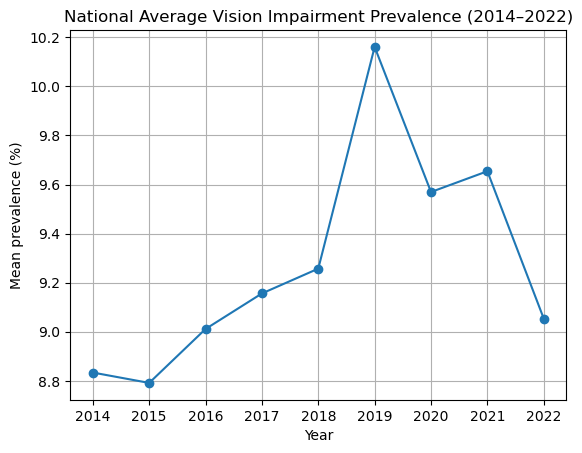

In [ ]:
df_ts = df_state_year.to_pandas()

# Plot national average trend
nat_trend = df_ts.groupby("year")["mean_prevalence"].mean().reset_index()

plt.plot(nat_trend["year"], nat_trend["mean_prevalence"], marker="o")
plt.title("National Average Vision Impairment Prevalence (2014–2022)")
plt.xlabel("Year")
plt.ylabel("Mean prevalence (%)")
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:        mean_prevalence   No. Observations:                    9
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -4.483
Date:                Thu, 06 Nov 2025   AIC                             12.966
Time:                        23:19:12   BIC                             13.125
Sample:                    01-01-2014   HQIC                            11.894
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3484      0.616     -0.566      0.572      -1.556       0.859
sigma2         0.1767      0.080      2.213      0.027       0.020       0.333
Ljung-Box (L1) (Q):                   0.00   Jarque-

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


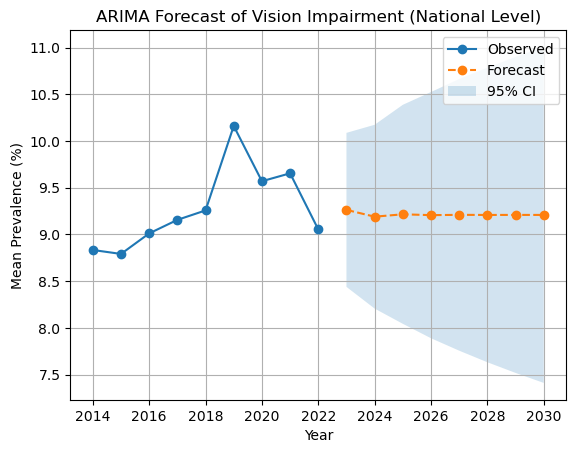

In [ ]:
y = nat_trend["mean_prevalence"]
y.index = pd.to_datetime(nat_trend["year"].astype(str) + "-01-01")

model = ARIMA(y, order=(1,1,0))
result = model.fit()
print(result.summary())

# Forecast for 8 future years (2023–2030)
forecast = result.get_forecast(steps=8)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure()
plt.plot(y.index.year, y.values, marker="o", label="Observed")
future_years = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
plt.plot(future_years, forecast_mean.values, marker="o", linestyle="--", label="Forecast")
plt.fill_between(future_years,
                 conf_int.iloc[:, 0].values,
                 conf_int.iloc[:, 1].values,
                 alpha=0.2, label="95% CI")
plt.xlabel("Year")
plt.ylabel("Mean Prevalence (%)")
plt.title("ARIMA Forecast of Vision Impairment (National Level)")
plt.legend()
plt.grid(True)
plt.show()

## Lag Features and Random Forest for Prediction

In [ ]:
df_ts = df_state_year.to_pandas()
df_ts = df_ts.sort_values(["state", "year"])

# Create lagged features
for lag in [1, 2]:
    df_ts[f"lag_{lag}"] = df_ts.groupby("state")["mean_prevalence"].shift(lag)

# Drop missing lag rows
df_ts = df_ts.dropna()
print(df_ts.head())

  state  year  mean_prevalence      lag_1     lag_2
2    AK  2016         9.262850   8.988427  9.031219
3    AK  2017         9.557879   9.262850  8.988427
4    AK  2018         9.609163   9.557879  9.262850
5    AK  2019        10.285106   9.609163  9.557879
6    AK  2020         9.779339  10.285106  9.609163


In [ ]:
X = df_ts[["lag_1", "lag_2"]]
y = df_ts["mean_prevalence"]

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)
print("MAE:", mean_absolute_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

MAE: 0.14373134994339395
R²: 0.9291994412470244


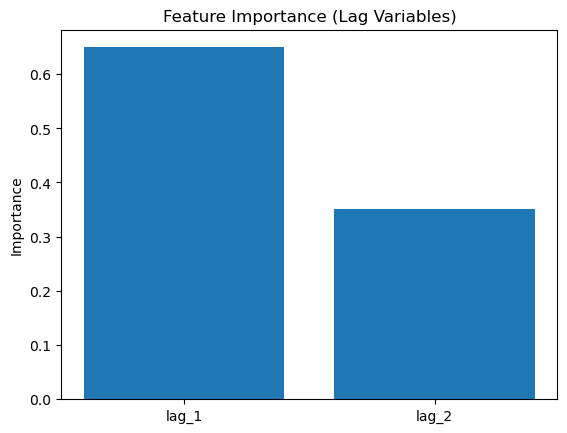

In [ ]:
plt.bar(["lag_1", "lag_2"], model.feature_importances_)
plt.title("Feature Importance (Lag Variables)")
plt.ylabel("Importance")
plt.show()

<Axes: >

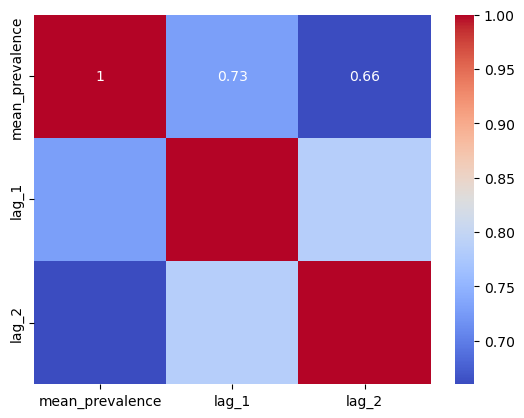

In [ ]:
import seaborn as sns
sns.heatmap(df_ts[["mean_prevalence", "lag_1", "lag_2"]].corr(), annot=True, cmap="coolwarm")

In [ ]:
latest = df_ts[df_ts["year"] == 2022][["state", "mean_prevalence"]]
lag_1 = latest["mean_prevalence"].values
lag_2 = df_ts[df_ts["year"] == 2021]["mean_prevalence"].values

import numpy as np
X_future = np.column_stack((lag_1, lag_2))
future_preds = model.predict(X_future)

pred_df = pd.DataFrame({
    "state": latest["state"],
    "predicted_2023_prevalence": future_preds
})
print(pred_df.head())

   state  predicted_2023_prevalence
8     AK                   9.166205
17    AL                   8.439191
26    AR                   9.498875
35    AZ                  10.246772
44    CA                   9.649114


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# 1) get 2022 and 2021 actuals
df_2022 = df_ts[df_ts["year"] == 2022][["state", "mean_prevalence"]].rename(
    columns={"mean_prevalence": "lag_1"}
)
df_2021 = df_ts[df_ts["year"] == 2021][["state", "mean_prevalence"]].rename(
    columns={"mean_prevalence": "lag_2"}
)

# 2) merge them so we have state, lag_1, lag_2 in ONE frame
# use inner join to keep only states present in both years
base_lags = df_2022.merge(df_2021, on="state", how="inner")

print(base_lags.head())
# you should see: state | lag_1 | lag_2

  state      lag_1      lag_2
0    AK   9.335983   9.492479
1    AL   8.478209   8.904151
2    AR   9.027139   9.599207
3    AZ  10.010057  10.617706
4    CA   9.515978  10.250310


In [ ]:
future_preds = []
lag_frame = base_lags.copy()  # has state, lag_1, lag_2

for year in range(2023, 2031):  # 2023–2030
    X_input = lag_frame[["lag_1", "lag_2"]]
    preds = model.predict(X_input)

    pred_df = pd.DataFrame({
        "state": lag_frame["state"],
        "year": year,
        "predicted_prevalence": preds
    })
    future_preds.append(pred_df)

    # update lags for next year:
    # new lag_1 = this year's prediction
    # new lag_2 = last year's lag_1
    lag_frame = pd.DataFrame({
        "state": lag_frame["state"],
        "lag_1": preds,                  # t becomes t-1 for next step
        "lag_2": lag_frame["lag_1"],     # old t-1 becomes t-2
    })

future_all = pd.concat(future_preds, ignore_index=True)

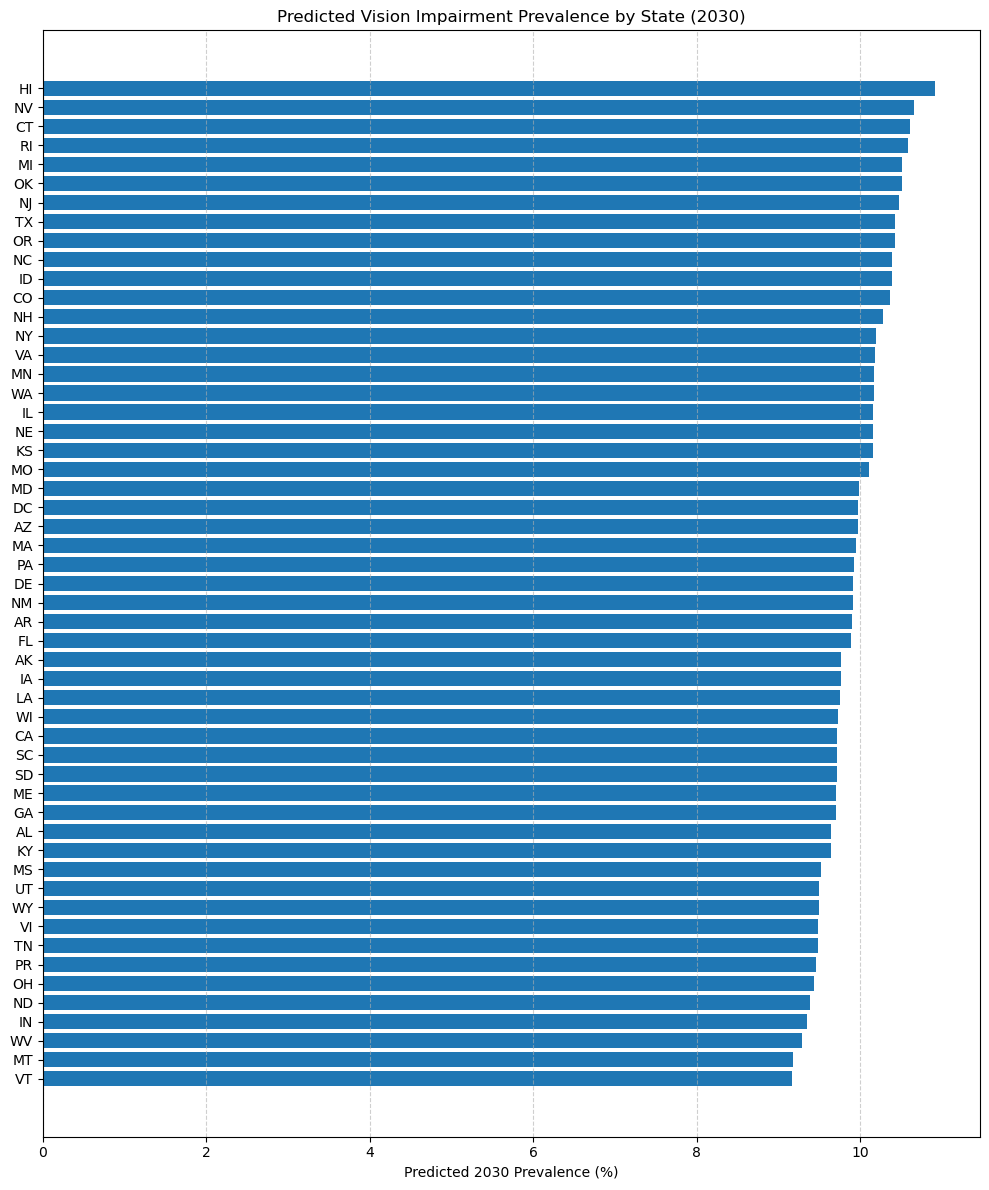

In [ ]:
final_2030 = future_all[future_all["year"] == 2030].sort_values("predicted_prevalence")

plt.figure(figsize=(10, 12))
plt.barh(final_2030["state"], final_2030["predicted_prevalence"])
plt.xlabel("Predicted 2030 Prevalence (%)")
plt.title("Predicted Vision Impairment Prevalence by State (2030)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

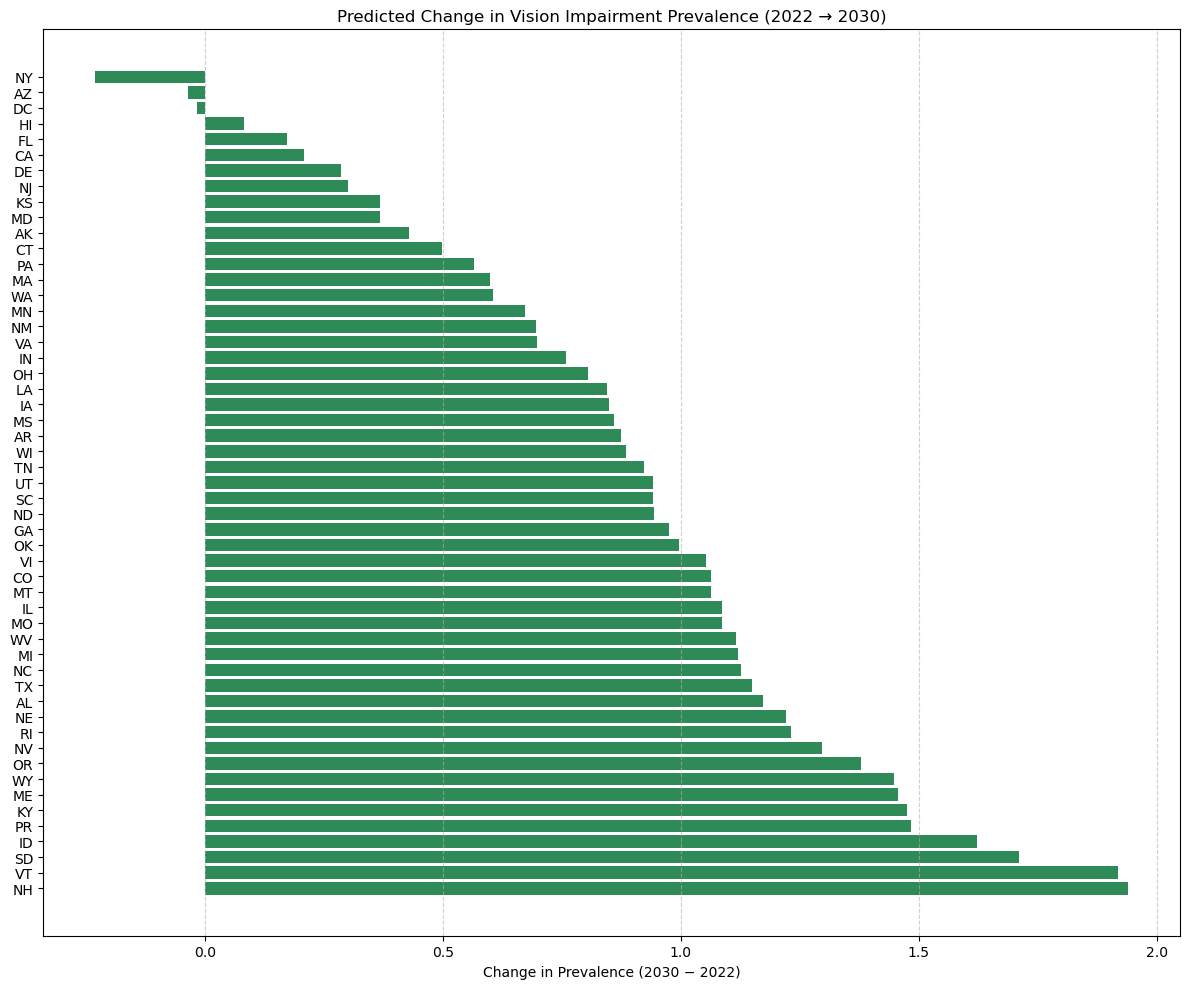

In [ ]:
# Get 2022 actuals
actual_2022 = df_ts[df_ts["year"] == 2022][["state", "mean_prevalence"]]

# Merge with 2030 predictions
change_df = final_2030.merge(actual_2022, on="state", how="left")

# Create calculated fields
change_df["abs_change"] = change_df["predicted_prevalence"] - change_df["mean_prevalence"]
change_df["pct_change"] = (change_df["abs_change"] / change_df["mean_prevalence"]) * 100

# Sort by largest increase
change_df = change_df.sort_values("abs_change", ascending=False)


plt.figure(figsize=(12, 10))
plt.barh(change_df["state"], change_df["abs_change"], color="seagreen")
plt.xlabel("Change in Prevalence (2030 − 2022)")
plt.title("Predicted Change in Vision Impairment Prevalence (2022 → 2030)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

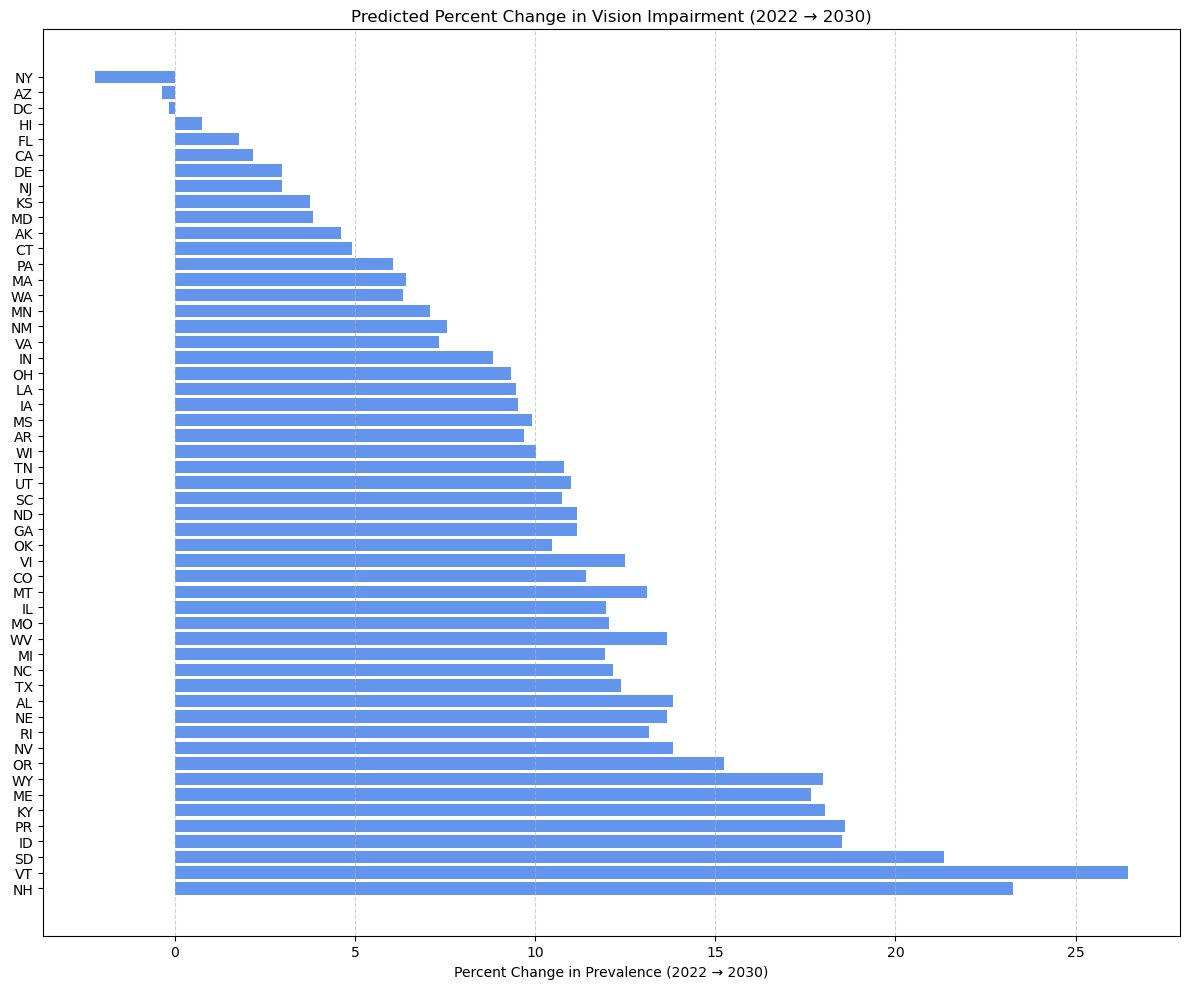

In [ ]:
plt.figure(figsize=(12, 10))
plt.barh(change_df["state"], change_df["pct_change"], color="cornflowerblue")
plt.xlabel("Percent Change in Prevalence (2022 → 2030)")
plt.title("Predicted Percent Change in Vision Impairment (2022 → 2030)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

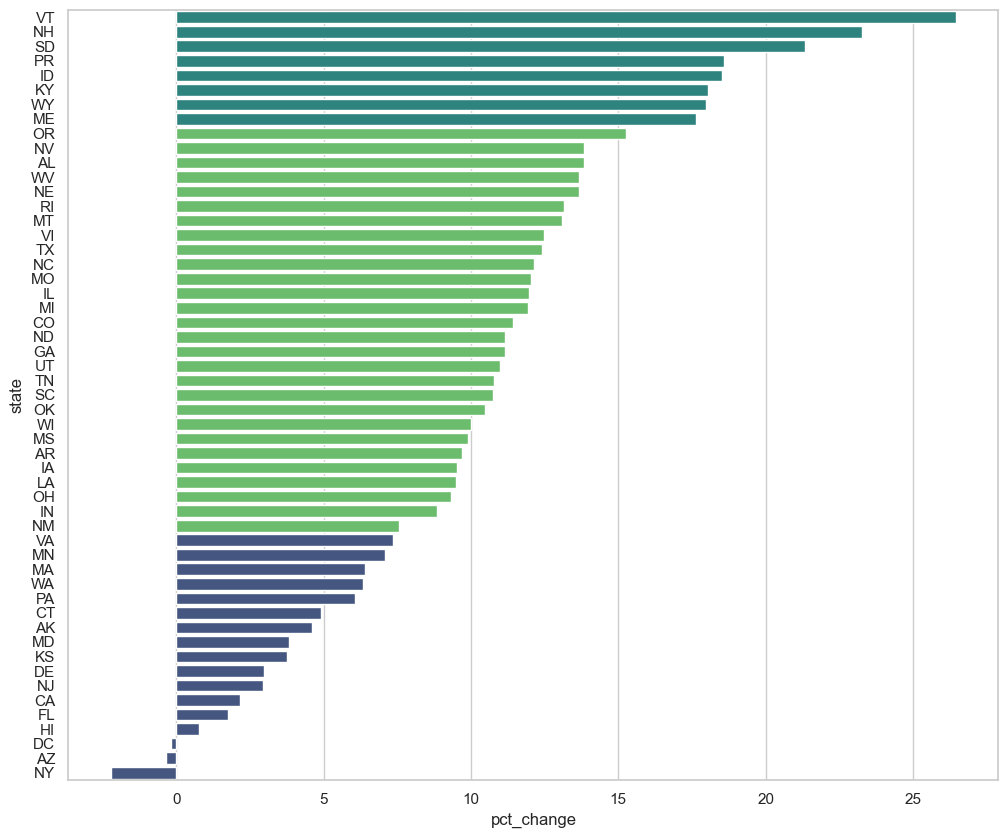

In [ ]:
# 0) see what we have
change_df["abs_change"] = change_df["predicted_prevalence"] - change_df["mean_prevalence"]
change_df["pct_change"] = (change_df["abs_change"] / change_df["mean_prevalence"]) * 100

# cluster setup
X = change_df[["pct_change"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
change_df["cluster"] = kmeans.fit_predict(X_scaled)

# sort for plotting
change_df = change_df.sort_values("pct_change", ascending=True)

# plot
plt.figure(figsize=(12, 10))
sns.barplot(
    data=change_df,
    y="state",
    x="pct_change",
    hue="cluster",
    dodge=False,
    palette="viridis"
)
plt.xlabel("Percent Change in Prevalence (2022 → 2030)")
plt.title("Clustered Percent Change in Vision Impairment (2022–2030)")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# --- 1. Compute percent change (if not already in your df) ---
change_df["pct_change"] = (
    (change_df["predicted_prevalence"] - change_df["mean_prevalence"])
    / change_df["mean_prevalence"]
) * 100

# --- 2. Load U.S. boundaries from geodatasets ---
# naturalearth.countries gives country polygons, so we’ll use it just to isolate the U.S.
us_map = gpd.read_file(geodatasets.get_path("naturalearth.countries"))
us_map = us_map[us_map["iso_a2"] == "US"]

# Note: this dataset has only the national outline — not individual states.
# To visualize state-level differences, we’ll overlay simplified state boundaries.
# You can download U.S. state polygons directly from the Census Bureau (quick source):
states = gpd.read_file(
    "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_state_20m.zip"
)

# --- 3. Merge state geometries with your change_df ---
abbr_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire",
    "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
    "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania",
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee",
    "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington",
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming", "DC": "District of Columbia"
}

change_df["state_name"] = change_df["state"].map(abbr_to_name)

# Merge shapefile and data
map_df = states.merge(change_df, left_on="NAME", right_on="state_name", how="left")

# --- 4. Plot the map ---
fig, ax = plt.subplots(figsize=(12, 8))

map_df.plot(
    column="pct_change",
    cmap="Reds",
    linewidth=0.6,
    edgecolor="gray",
    legend=True,
    legend_kwds={
        "label": "Percent Change in Vision Impairment (2022–2030)",
        "orientation": "horizontal",
        "pad": 0.02
    },
    ax=ax
)

ax.set_title(
    "Projected Percent Change in Vision Impairment by U.S. State (2022–2030)",
    fontsize=14,
    pad=14
)
ax.axis("off")

plt.tight_layout()
plt.show()

NameError: name 'change_df' is not defined

## Linear and NonLinear Models

In [ ]:
sns.set(style="whitegrid")


# --- 1. convert polars -> pandas ---

# df_all_states was originally Polars, so convert that
df_pd = df_all_states.to_pandas()

# df_ts is already pandas, so just assign it directly
df_ts_pd = df_ts     # no .to_pandas() here


# --- 2. basic cleaning ---
# make sure target is numeric
df_pd["data_value"] = pd.to_numeric(df_pd["data_value"], errors="coerce")

# remove "aggregate" buckets
exclude_ages = ["18 years and older", "All Ages"]
exclude_sexes = ["Both sexes"]
exclude_races = ["All races", "All Race/Ethnicity", "All ethnicities"]

df_model = (
    df_pd
    .dropna(subset=["data_value", "age", "sex", "raceethnicity",
                    "locationabbr", "yearstart"])
    .query("age not in @exclude_ages")
    .query("sex not in @exclude_sexes")
    .query("raceethnicity not in @exclude_races")
    .copy()
)

# --- 3. bring in lag_1, lag_2 from the time-series table ---
# df_ts_pd has columns: ['state','year','mean_prevalence','lag_1','lag_2']
# match: state <-> locationabbr, year <-> yearstart
df_ts_pd = df_ts_pd.rename(columns={"state": "locationabbr",
                                    "year": "yearstart"})

df_model = df_model.merge(
    df_ts_pd[["locationabbr", "yearstart", "lag_1", "lag_2"]],
    on=["locationabbr", "yearstart"],
    how="left"
)

# optional: if you want to drop rows without lags
# df_model = df_model.dropna(subset=["lag_1", "lag_2"])


/var/folders/72/6hd7xcr10ls25qzg56lkny3c0000gn/T/ipykernel_97387/112821713.py:24: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("n")


In [ ]:
# --- 4. fit the regression ---
# this is your original formula, plus the lags
formula = (
    "data_value ~ C(age) + C(sex) + C(raceethnicity) "
    "+ C(topic) + C(category) + lag_1 + lag_2"
)

model_linear = smf.ols(formula, data=df_model).fit()
print(model_linear.summary())


                            OLS Regression Results                            
Dep. Variable:             data_value   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                 1.035e+05
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:33:50   Log-Likelihood:            -1.5387e+07
No. Observations:             3908036   AIC:                         3.077e+07
Df Residuals:                 3907993   BIC:                         3.077e+07
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
# Get the summary2 object (cleaner tables)
summary2 = model_linear.summary2()

# Export as LaTeX table
with open("ols_initial_clean_table.tex", "w") as f:
    f.write(summary2.as_latex())

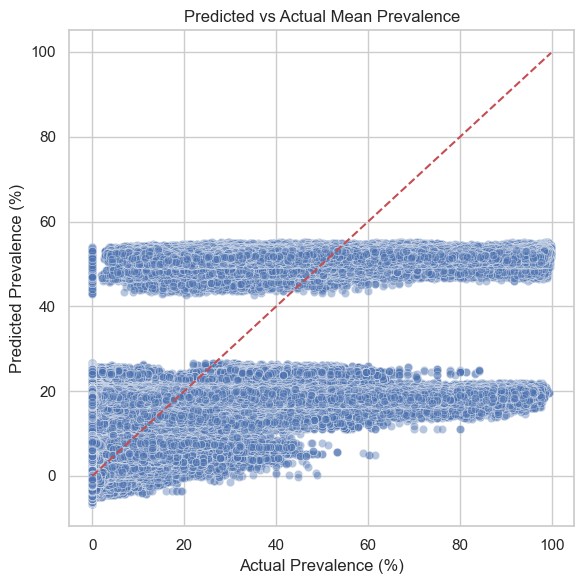

In [ ]:
# --- 5. PLOT 1: Predicted vs Actual ---
y_true = model_linear.model.endog
y_pred = model_linear.fittedvalues

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--')
plt.xlabel("Actual Prevalence (%)")
plt.ylabel("Predicted Prevalence (%)")
plt.title("Predicted vs Actual Mean Prevalence")
plt.tight_layout()
plt.show()


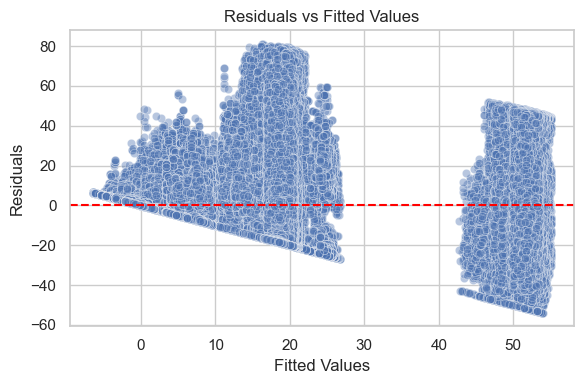

In [ ]:
# --- 7. PLOT 3: Residuals vs Fitted ---
residuals = model_linear.resid
fitted = model_linear.fittedvalues

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted, y=residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [ ]:
# 1) start from polars -> aggregate
# drop the aggregate buckets first
exclude_ages = ["18 years and older", "All Ages"]
exclude_sexes = ["Both sexes"]
exclude_races = ["All races", "All Race/Ethnicity", "All ethnicities"]

df_clean = (
    df_all_states
    .filter(~pl.col("age").is_in(exclude_ages))
    .filter(~pl.col("sex").is_in(exclude_sexes))
    .filter(~pl.col("raceethnicity").is_in(exclude_races))
    .filter(pl.col("data_value").is_not_null())
)

# aggregate to a higher level
df_agg = (
    df_clean
    .group_by(["locationabbr", "yearstart", "age", "sex", "raceethnicity"])
    .agg([
        pl.col("data_value").mean().alias("mean_prevalence"),
        pl.count().alias("n")
    ])
)

# 2) convert to pandas
df_agg_pd = df_agg.to_pandas()

# 3) bring in lags from df_ts (already pandas)
df_ts_pd = df_ts.rename(columns={"state": "locationabbr", "year": "yearstart"})
df_agg_pd = df_agg_pd.merge(
    df_ts_pd[["locationabbr", "yearstart", "lag_1", "lag_2"]],
    on=["locationabbr", "yearstart"],
    how="left"
)


/var/folders/72/6hd7xcr10ls25qzg56lkny3c0000gn/T/ipykernel_97387/3959844289.py:21: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("n")


In [ ]:
# 4) fit regression on aggregated data
model = smf.ols(
    "mean_prevalence ~ C(age) + C(sex) + C(raceethnicity) + lag_1 + lag_2",
    data=df_agg_pd
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        mean_prevalence   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     987.9
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:40:03   Log-Likelihood:                -27719.
No. Observations:               11690   AIC:                         5.547e+04
Df Residuals:                   11674   BIC:                         5.559e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

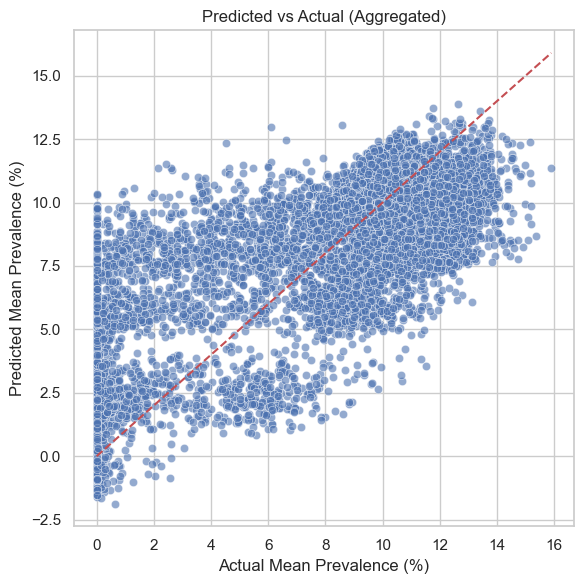

In [ ]:
# 5) Predicted vs Actual on aggregated data
y_true = df_agg_pd["mean_prevalence"]
y_pred = model.fittedvalues

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         "r--")
plt.xlabel("Actual Mean Prevalence (%)")
plt.ylabel("Predicted Mean Prevalence (%)")
plt.title("Predicted vs Actual (Aggregated)")
plt.tight_layout()
plt.show()

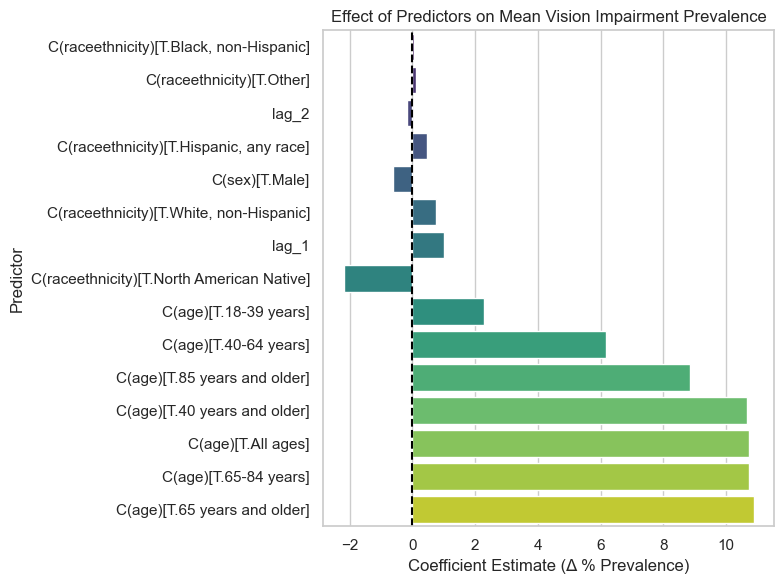

In [ ]:
# Extract coefficients from the model
coef_df = (
    model.summary2().tables[1]
    .reset_index()
    .rename(columns={"index": "term"})
)

# Drop the intercept
coef_df = coef_df[coef_df["term"] != "Intercept"].copy()

# Sort by absolute coefficient size
coef_df["abs_coef"] = coef_df["Coef."].abs()
coef_df = coef_df.sort_values("abs_coef", ascending=True)

# Plot
plt.figure(figsize=(8, max(6, len(coef_df) * 0.25)))
sns.barplot(
    x="Coef.", y="term",
    data=coef_df,
    palette="viridis",
    orient="h"
)
plt.axvline(0, color="black", linestyle="--")
plt.title("Effect of Predictors on Mean Vision Impairment Prevalence")
plt.xlabel("Coefficient Estimate (Δ % Prevalence)")
plt.ylabel("Predictor")
plt.tight_layout()
plt.show()

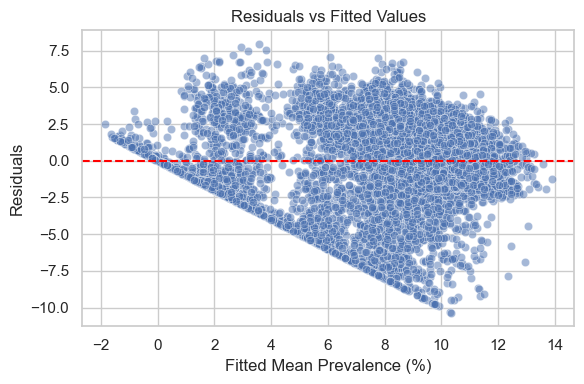

In [ ]:
# Residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Mean Prevalence (%)")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


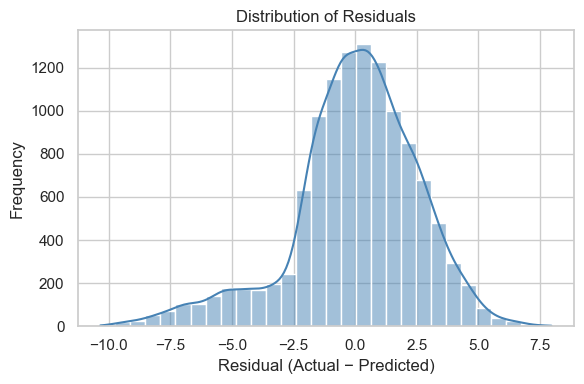

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True, color="steelblue")
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Quadratic terms for lag_1 and lag_2 + interactions between age and sex
model_poly = smf.ols(
    "mean_prevalence ~ C(age)*C(sex) + C(raceethnicity) + lag_1 + I(lag_1**2) + lag_2 + I(lag_2**2)",
    data=df_agg_pd
).fit()

print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:        mean_prevalence   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     636.4
Date:                Fri, 07 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:46:14   Log-Likelihood:                -27617.
No. Observations:               11690   AIC:                         5.528e+04
Df Residuals:                   11665   BIC:                         5.547e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [ ]:
# Get the summary2 object (cleaner tables)
summary3 = model_poly.summary2()

# Export as LaTeX table
with open("ols_poly_clean_table.tex", "w") as f:
    f.write(summary3.as_latex())

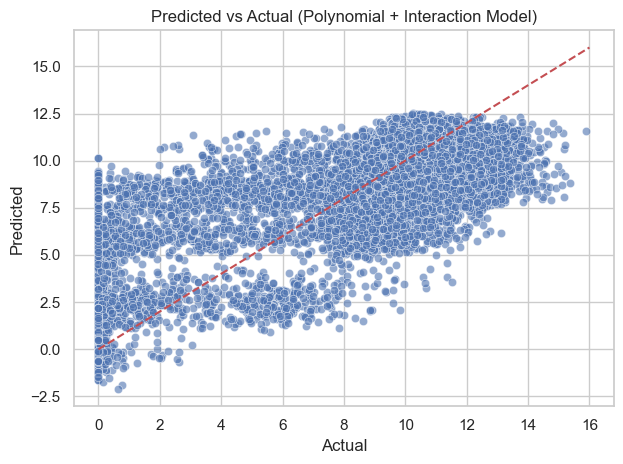

In [ ]:
y_pred_poly = model_poly.fittedvalues
sns.scatterplot(x=df_agg_pd["mean_prevalence"], y=y_pred_poly, alpha=0.6)
plt.plot([0, 16], [0, 16], "r--")
plt.title("Predicted vs Actual (Polynomial + Interaction Model)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

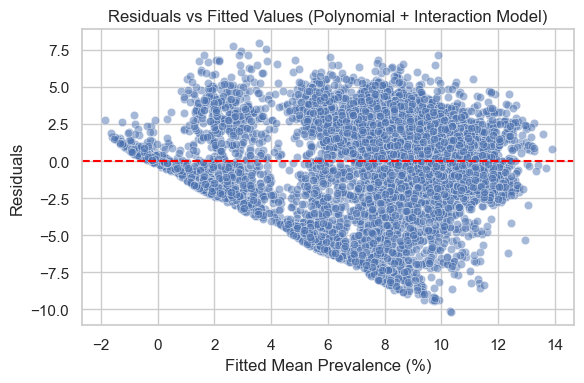

In [ ]:
# Residuals and fitted values
residuals_poly = model_poly.resid
fitted_poly = model_poly.fittedvalues

plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals_poly, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values (Polynomial + Interaction Model)")
plt.xlabel("Fitted Mean Prevalence (%)")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

Random Forest R²: 0.791
Random Forest RMSE: 1.758


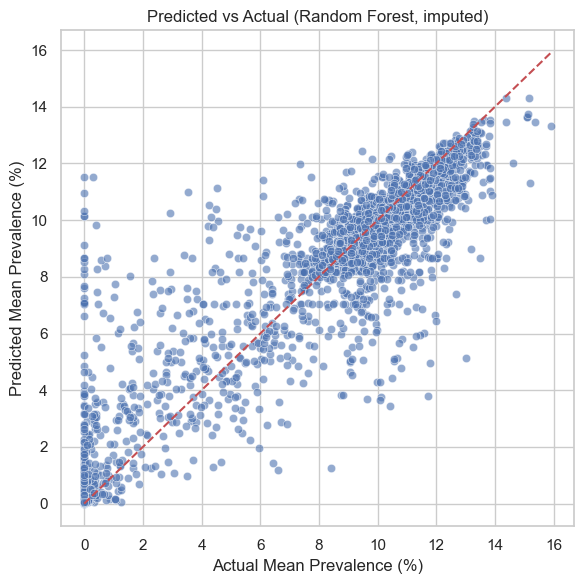

In [ ]:
sns.set(style="whitegrid")

# features we used in the agg model
cat_cols = ["age", "sex", "raceethnicity"]
num_cols = ["lag_1", "lag_2"]

# X, y
X = df_agg_pd[cat_cols + num_cols]
y = df_agg_pd["mean_prevalence"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# preprocessing: impute -> encode
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",
         Pipeline([
             ("imputer", SimpleImputer(strategy="most_frequent")),
             ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
         ]),
         cat_cols),
        ("num",
         Pipeline([
             ("imputer", SimpleImputer(strategy="mean"))
         ]),
         num_cols),
    ]
)

# full pipeline
rf_pipe = Pipeline([
    ("pre", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# fit
rf_pipe.fit(X_train, y_train)

# predict
y_pred_rf = rf_pipe.predict(X_test)

# metrics
r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest R²: {r2:.3f}")
print(f"Random Forest RMSE: {rmse:.3f}")

# plot predicted vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("Actual Mean Prevalence (%)")
plt.ylabel("Predicted Mean Prevalence (%)")
plt.title("Predicted vs Actual (Random Forest, imputed)")
plt.tight_layout()
plt.show()

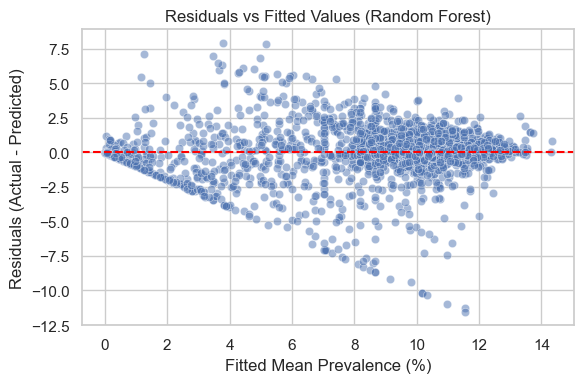

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


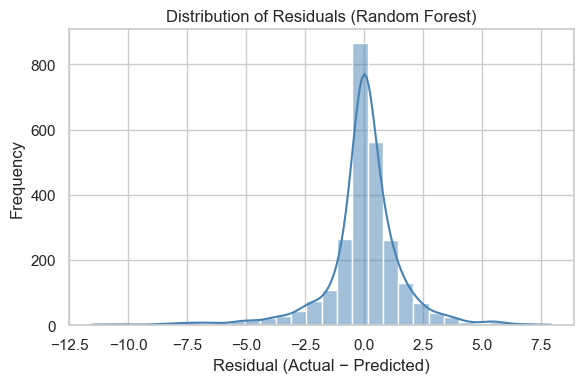

In [ ]:
# --- 1. Compute residuals ---
residuals_rf = y_test - y_pred_rf
fitted_rf = y_pred_rf

# --- 2. Residuals vs Fitted Values ---
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted_rf, y=residuals_rf, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Fitted Values (Random Forest)")
plt.xlabel("Fitted Mean Prevalence (%)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()

# --- 3. Residual Distribution ---
plt.figure(figsize=(6,4))
sns.histplot(residuals_rf, bins=30, kde=True, color="steelblue")
plt.title("Distribution of Residuals (Random Forest)")
plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
def model_summary(name, y_true, y_pred, model=None):
    """Generate summary statistics for a regression model."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    
    # statsmodels models (linear, polynomial) have extra info
    if model is not None and hasattr(model, "aic"):
        aic = model.aic
        bic = model.bic
        adj_r2 = model.rsquared_adj
    else:
        aic = np.nan
        bic = np.nan
        adj_r2 = np.nan

    return {
        "Model": name,
        "R²": round(r2, 3),
        "Adj. R²": round(adj_r2, 3),
        "RMSE": round(rmse, 3),
        "MAE": round(mae, 3),
        "AIC": round(aic, 1) if not np.isnan(aic) else None,
        "BIC": round(bic, 1) if not np.isnan(bic) else None
    }

In [ ]:
# --- Linear regression ---
y_pred_linear = model_linear.fittedvalues
y_true_linear = model_linear.model.endog

# --- Polynomial regression (if you fit one) ---
y_pred_poly = model_poly.fittedvalues
y_true_poly = model_poly.model.endog

# --- Random Forest ---
# Already have: y_test, y_pred_rf

# Collect summaries
summary_list = [
    model_summary("Linear Regression", y_true_linear, y_pred_linear, model_linear),
    model_summary("Polynomial Regression", y_true_poly, y_pred_poly, model_poly),
    model_summary("Random Forest", y_test, y_pred_rf)
]

summary_df = pd.DataFrame(summary_list)
summary_df

,Model,R²,Adj. R²,RMSE,MAE,AIC,BIC
0,Linear Regression,0.527,0.527,12.407,7.122,30773284.7,30773851.4
1,Polynomial Regression,0.567,0.566,2.569,1.944,55283.1,55467.3
2,Random Forest,0.791,NaN,1.758,1.052,NaN,NaN


In [ ]:
summary_df.to_latex(
    "model_summary.tex",
    index=False,
    caption="Summary statistics comparing model performance across linear, polynomial, and nonlinear regressions.",
    label="tab:model_summary"
)